In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from funpymodeling.exploratory import freq_tbl

In [3]:
# Carga desde un archivo .xlsx sin indice
Mexico = pd.read_csv('Mexico.csv')

In [4]:
# Verificamos información del dataframe
Mexico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26582 entries, 0 to 26581
Data columns (total 50 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            26582 non-null  int64  
 1   last_scraped                                  26582 non-null  object 
 2   name                                          26582 non-null  object 
 3   host_id                                       26582 non-null  int64  
 4   host_name                                     26582 non-null  object 
 5   host_since                                    26582 non-null  object 
 6   host_response_time                            26582 non-null  object 
 7   host_is_superhost                             26582 non-null  object 
 8   host_identity_verified                        26582 non-null  object 
 9   neighbourhood                                 26582 non-null 

DETERMINACIÓN DE CLASES PARA DATOS AGRUPADOS 

In [5]:
#Calculamos el numero total de la población "n"

Mexico['accommodates'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 26582 entries, 0 to 26581
Series name: accommodates
Non-Null Count  Dtype  
--------------  -----  
26582 non-null  float64
dtypes: float64(1)
memory usage: 207.8 KB


In [6]:
# Obtenemos el limite superior y el límite inferios de la columna objetivo
Max = Mexico['accommodates'].max()
Min = Mexico['accommodates'].min()
Limites = [Min, Max]
Limites

[1.0, 10.0]

In [7]:
# Calculamos el rango R
R = Max - Min
R

9.0

In [8]:
# Calculamos el número de intervalos de clase "ni", aplicando la regla de Sturges
n = 26582

ni = 1 + 3.32 * np.log10(n)
ni

15.689631010177528

In [9]:
# Calculamos el ancho del intervalo "i"
i = R / ni
i

0.5736272570184661

CREACIÓN DE CATEGORÍAS A PARTIR DE CLASES

In [11]:
# Categorización de variables
intervalos = np.linspace (1, 10, 16)
intervalos

array([ 1. ,  1.6,  2.2,  2.8,  3.4,  4. ,  4.6,  5.2,  5.8,  6.4,  7. ,
        7.6,  8.2,  8.8,  9.4, 10. ])

In [12]:
# Creamos las categorías
categorias = [ "Categoria1", "Categoria2", "Categoria3", "Categoria4", "Categoria5", "Categoria6", "Categoria7", "Categoria8", "Categoria9", "Categoria10", "Categoria11", "Categoria12", "Categoria13", "Categoria14", "Categoria15" ]

In [13]:
# Creamos las ctegorias en la columna numerica
Mexico['accommodates'] = pd.cut ( x = Mexico ['accommodates'], bins = intervalos, labels = categorias )
Mexico['accommodates']

0        Categoria2
1        Categoria4
2        Categoria5
3        Categoria2
4        Categoria2
            ...    
26577    Categoria5
26578    Categoria2
26579    Categoria2
26580    Categoria2
26581    Categoria2
Name: accommodates, Length: 26582, dtype: category
Categories (15, object): ['Categoria1' < 'Categoria2' < 'Categoria3' < 'Categoria4' ... 'Categoria12' < 'Categoria13' < 'Categoria14' < 'Categoria15']

In [14]:
table1 = freq_tbl(Mexico['accommodates'])
table1

accommodates  frequency  percentage  cumulative_perc
0    Categoria2      10620    0.399518         0.450975
1    Categoria5       5690    0.214055         0.692598
2    Categoria4       2927    0.110112         0.816892
3    Categoria9       1800    0.067715         0.893329
4    Categoria7       1375    0.051727         0.951718
5   Categoria12        516    0.019412         0.973629
6   Categoria10        311    0.011700         0.986836
7   Categoria15        216    0.008126         0.996008
8   Categoria14         94    0.003536         1.000000
9    Categoria1          0    0.000000         1.000000
10   Categoria3          0    0.000000         1.000000
11   Categoria6          0    0.000000         1.000000
12   Categoria8          0    0.000000         1.000000
13  Categoria11          0    0.000000         1.000000
14  Categoria13          0    0.000000         1.000000

In [15]:
# Elimino las columnas "porcentage" y "cumulative_perc" para trabajar con las frecuencias

table2 = table1.drop(['percentage', 'cumulative_perc'], axis=1)
table2

accommodates  frequency
0    Categoria2      10620
1    Categoria5       5690
2    Categoria4       2927
3    Categoria9       1800
4    Categoria7       1375
5   Categoria12        516
6   Categoria10        311
7   Categoria15        216
8   Categoria14         94
9    Categoria1          0
10   Categoria3          0
11   Categoria6          0
12   Categoria8          0
13  Categoria11          0
14  Categoria13          0

In [16]:
Filtro = table2[ table2['frequency'] >= 94]
Filtro

accommodates  frequency
0   Categoria2      10620
1   Categoria5       5690
2   Categoria4       2927
3   Categoria9       1800
4   Categoria7       1375
5  Categoria12        516
6  Categoria10        311
7  Categoria15        216
8  Categoria14         94

In [17]:
# Ajusto el indice de mi data frame

Filtro_index = Filtro.set_index('accommodates')
Filtro_index

frequency
accommodates           
Categoria2        10620
Categoria5         5690
Categoria4         2927
Categoria9         1800
Categoria7         1375
Categoria12         516
Categoria10         311
Categoria15         216
Categoria14          94

<Axes: xlabel='accommodates'>

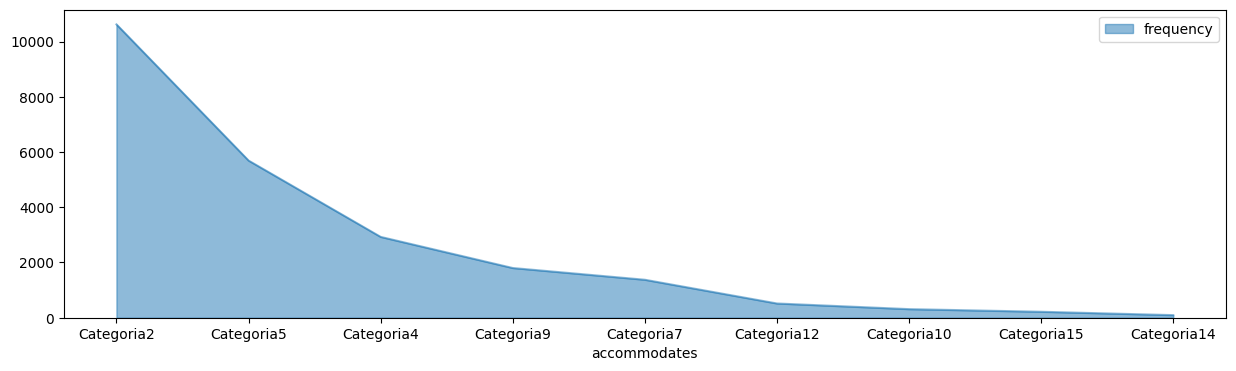

In [18]:
# Realizamos gráfico de area del dataframe filtrado
Filtro_index.plot(kind = 'area', figsize = (15,4), alpha = 0.5)